In [1]:
import numpy as np
import torch
torch.__version__

'1.8.1'

In [2]:
## Input - temp, rainfall, humidity

inputs = np.array([[73, 67, 43],
                  [91, 88, 64],
                  [87, 134, 58],
                  [102, 43, 37],
                  [69, 96, 70]
                  ], dtype = 'float32')


In [3]:
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]
                   ], dtype = 'float32')

# note the way to specify dtype even though we have given integers

In [4]:
# convert inputs to tensors

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [5]:
## Weights and biases
w = torch.randn(2, 3, requires_grad = True) # 2 weights x 3 features
b = torch.randn(2, requires_grad = True)

print(w)
print(b)

tensor([[ 0.0979, -0.6916,  0.3836],
        [-0.5740,  0.8482, -0.2021]], requires_grad=True)
tensor([-0.4375, -0.5554], requires_grad=True)


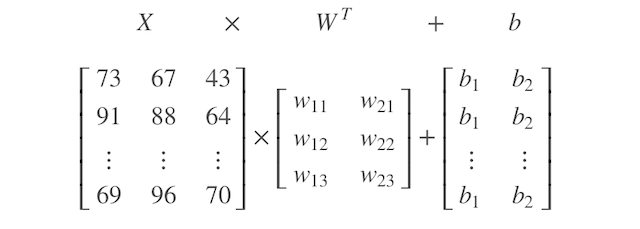

In [6]:
def model(x):
    return x @ w.t() + b

```@``` represents matrix multiplication

In [7]:
## Generate predictions
preds = model(inputs)
preds

tensor([[-23.1323,   5.6828],
        [-27.8379,   8.9190],
        [-62.3445,  51.4453],
        [ -5.9961, -30.1069],
        [-33.2232,  27.1196]], grad_fn=<AddBackward0>)

In [8]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Loss function

In [9]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

# numel method returns number of elements in a tensor. instead of diff.numel we can also do t1.numel, or t2.numel

In [10]:
loss = mse(preds, targets)

# Compute Gradients

In [11]:
loss.backward()

In [12]:
print(w)
print(w.grad)

tensor([[ 0.0979, -0.6916,  0.3836],
        [-0.5740,  0.8482, -0.2021]], requires_grad=True)
tensor([[ -8742.5762, -10692.2051,  -6291.5557],
        [ -6670.8872,  -7009.3638,  -4460.7153]])


In [13]:
print(b)
print(b.grad)

tensor([-0.4375, -0.5554], requires_grad=True)
tensor([-106.7068,  -79.3880])


In [14]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# Iteration 1

In [15]:
## Generate predictions
preds = model(inputs)
preds

tensor([[-23.1323,   5.6828],
        [-27.8379,   8.9190],
        [-62.3445,  51.4453],
        [ -5.9961, -30.1069],
        [-33.2232,  27.1196]], grad_fn=<AddBackward0>)

In [16]:
loss = mse(preds, targets)
loss

tensor(10254.6113, grad_fn=<DivBackward0>)

In [17]:
loss.backward()

In [18]:
print(w.grad)
print(b.grad)

tensor([[ -8742.5762, -10692.2051,  -6291.5557],
        [ -6670.8872,  -7009.3638,  -4460.7153]])
tensor([-106.7068,  -79.3880])


In [19]:
with torch.no_grad(): # Don't update gradients until the below is evaluated
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [20]:
print(w)
print(b)

tensor([[ 0.1853, -0.5847,  0.4465],
        [-0.5073,  0.9183, -0.1575]], requires_grad=True)
tensor([-0.4365, -0.5546], requires_grad=True)


In [21]:
# Calculate new loss
preds = model(inputs)
loss = mse(preds, targets)
loss

tensor(7122.9844, grad_fn=<DivBackward0>)

In [22]:
# Train for multiple epochs

In [23]:
for i in range(200):
    ## Generate predictions
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad(): # Don't update gradients until the below is evaluated
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()


In [24]:
print(loss)

tensor(81.4215, grad_fn=<DivBackward0>)


# Linear Regression Using Pytorch built-ins

In [25]:
import torch.nn as nn

using 15 examples this time instead of 5

In [26]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

## Dataset and Dataset Loader

In [27]:
from torch.utils.data import TensorDataset

In [28]:
train_df = TensorDataset(inputs, targets) 

TensorDataset allows us to access datasets even small sections of the dataset as tuples (inputs and target)

In [29]:
train_df[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [30]:
train_df[[1,3,5,7]]

(tensor([[ 91.,  88.,  64.],
         [102.,  43.,  37.],
         [ 74.,  66.,  43.],
         [ 88., 134.,  59.]]),
 tensor([[ 81., 101.],
         [ 22.,  37.],
         [ 57.,  69.],
         [118., 132.]]))

In [31]:
from torch.utils.data import DataLoader

DataLoader helps in accessing data in slices of *predefined* size (for batches) and also can shuffle if required

In [32]:
batch_size = 5
train_dl = DataLoader(train_df, batch_size, shuffle = True)

Lets look at one batch of data

In [33]:
for xb, yb in train_dl:
    print(xb), print(yb)
    break

tensor([[ 68.,  97.,  70.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 87., 135.,  57.],
        [ 73.,  67.,  43.]])
tensor([[102., 120.],
        [ 22.,  37.],
        [ 81., 101.],
        [118., 134.],
        [ 56.,  70.]])


All batches

In [34]:
for xb, yb in train_dl:
    print(xb), print(yb)
    #break

tensor([[102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 68.,  96.,  71.],
        [ 92.,  87.,  64.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [ 56.,  70.],
        [104., 118.],
        [ 82., 100.],
        [103., 119.]])
tensor([[ 87., 134.,  58.],
        [103.,  43.,  36.],
        [101.,  44.,  37.],
        [ 88., 134.,  59.],
        [ 91.,  87.,  65.]])
tensor([[119., 133.],
        [ 20.,  38.],
        [ 21.,  38.],
        [118., 132.],
        [ 80., 102.]])
tensor([[ 87., 135.,  57.],
        [ 73.,  66.,  44.],
        [ 91.,  88.,  64.],
        [ 68.,  97.,  70.],
        [ 74.,  66.,  43.]])
tensor([[118., 134.],
        [ 57.,  69.],
        [ 81., 101.],
        [102., 120.],
        [ 57.,  69.]])


## nn.Linear

In [35]:
model = nn.Linear(3, 2) #3 features and 2 weights 
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2579,  0.5223,  0.1942],
        [-0.2226, -0.0941, -0.1160]], requires_grad=True)
Parameter containing:
tensor([0.1426, 0.5770], requires_grad=True)


In [36]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2579,  0.5223,  0.1942],
         [-0.2226, -0.0941, -0.1160]], requires_grad=True),
 Parameter containing:
 tensor([0.1426, 0.5770], requires_grad=True)]

In [37]:
preds = model(inputs)
preds

tensor([[ 24.6587, -26.9652],
        [ 35.0620, -35.3844],
        [ 58.9532, -38.1263],
        [  3.4806, -30.4657],
        [ 46.0785, -31.9365],
        [ 23.8786, -27.0937],
        [ 34.7339, -35.4063],
        [ 58.8894, -38.4649],
        [  4.2608, -30.3372],
        [ 46.5306, -31.8300],
        [ 24.3306, -26.9872],
        [ 34.2819, -35.5129],
        [ 59.2813, -38.1043],
        [  3.0286, -30.5722],
        [ 46.8587, -31.8080]], grad_fn=<AddmmBackward>)

## Loss Function

In [38]:
import torch.nn.functional as F

In [39]:
loss_fn = F.mse_loss

In [40]:
loss = loss_fn(preds, targets)
loss

tensor(9482.7490, grad_fn=<MseLossBackward>)

## Optimizer

In [41]:
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)

```model.parameters()``` is passed to as an argument to optim.SGD() for the optimizer to know which matrices to modify and update in each step

## Train the model

In [42]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step() #update model paramaters with calculated gradients
            opt.zero_grad()
        if (epoch+1) % 10 == 0:
            print("Epoch : ", epoch+1, " Loss: ", loss.item()) #loss is still a tensor
            
        
    

In [43]:
fit(100, model, loss_fn, opt)

Epoch :  10  Loss:  160.76846313476562
Epoch :  20  Loss:  119.9647445678711
Epoch :  30  Loss:  120.0996322631836
Epoch :  40  Loss:  63.7965202331543
Epoch :  50  Loss:  76.3111343383789
Epoch :  60  Loss:  53.74664306640625
Epoch :  70  Loss:  22.26707649230957
Epoch :  80  Loss:  33.5667610168457
Epoch :  90  Loss:  19.450809478759766
Epoch :  100  Loss:  27.78045654296875


In [44]:
preds = model(inputs)
preds

tensor([[ 57.6782,  71.7542],
        [ 80.5419,  98.1749],
        [120.9130, 136.6545],
        [ 24.3107,  44.2283],
        [ 97.2214, 110.6773],
        [ 56.4626,  70.7494],
        [ 80.0762,  97.7579],
        [121.0492, 137.0082],
        [ 25.5263,  45.2332],
        [ 97.9713, 111.2652],
        [ 57.2125,  71.3373],
        [ 79.3263,  97.1700],
        [121.3787, 137.0715],
        [ 23.5608,  43.6405],
        [ 98.4370, 111.6822]], grad_fn=<AddmmBackward>)

In [45]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

# Assignment - Boston Housing Price Prediction

https://www.kaggle.com/anmolkumar/house-price-prediction-challenge?select=train.csv

In [46]:
import pandas as pd
train_df = pd.read_csv("./data/train.csv")

/Users/admin/.pyenv/versions/3.7.9/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [47]:
train_df.shape

(29451, 12)

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [49]:
train_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [50]:
# removing categorical columns for simplicity
train_df.drop(columns=['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], inplace=True)

(array([2.7991e+04, 9.0500e+02, 2.1000e+02, 9.8000e+01, 3.9000e+01,
        3.0000e+01, 1.6000e+01, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+01, 3.0000e+00, 4.0000e+00, 1.5000e+01,
        4.0000e+00, 8.0000e+00, 9.0000e+00, 1.1000e+01, 1.0000e+01,
        1.9000e+01, 2.2000e+01, 1.5000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

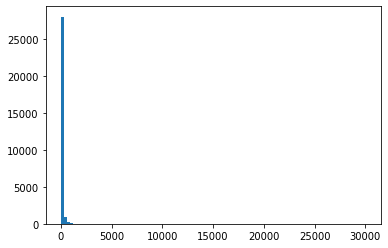

In [51]:
import matplotlib.pyplot as plt
plt.hist(train_df['TARGET(PRICE_IN_LACS)'], 100)

In [52]:
# remove outliers
train_df = train_df[train_df["TARGET(PRICE_IN_LACS)"] < 100]
train_df.shape

(21375, 9)

the below

In [80]:
X = train_df.drop(columns=['TARGET(PRICE_IN_LACS)'])
y = train_df['TARGET(PRICE_IN_LACS)']

or

In [54]:
# X = train_df[['SQUARE_FT', 'BHK_NO.']]
# y = train_df['TARGET(PRICE_IN_LACS)']

In [55]:
train_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,21375.000000,21375.000000,21375.000000,2.137500e+04,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000
mean,0.170994,0.282339,2.196725,1.468076e+03,0.829006,0.937123,21.652100,77.262097,50.187413
std,0.376513,0.450148,0.737129,3.074673e+04,0.376513,0.242748,6.352959,10.719120,22.529610
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,8.250825e+02,1.000000,1.000000,17.828446,74.861158,32.000000
50%,0.000000,0.000000,2.000000,1.097837e+03,1.000000,1.000000,22.285717,77.367400,47.400000
75%,0.000000,1.000000,3.000000,1.350190e+03,1.000000,1.000000,26.979452,78.418890,67.000000
max,1.000000,1.000000,20.000000,4.300000e+06,1.000000,1.000000,59.912884,152.962676,99.900000


In [56]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


below is to scale X, without scaling it doesnt work

In [57]:
#X = X.values # nd array

In [81]:
from sklearn import preprocessing

x = X.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
X_scaled = standard_scaler.fit_transform(x)

scale Y, but not needed

In [82]:
y = y.values
# y = y.reshape(-1,1)
# normalize_y = preprocessing.MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(y)

In [83]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [115]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7
count,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04
mean,-3.989012e-18,-2.576237e-17,3.118078e-16,-3.989012e-18,-9.739837e-17,-2.147418e-16,7.978024e-17,-3.633325e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-4.541631e-01,-6.272288e-01,-1.623532e+00,-4.765093e-02,-2.201852e+00,-3.860572e+00,-9.344700e+00,-1.856757e+01
25%,-4.541631e-01,-6.272288e-01,-2.668863e-01,-2.091307e-02,4.541631e-01,2.590290e-01,-6.018840e-01,-2.239917e-01
50%,-4.541631e-01,-6.272288e-01,-2.668863e-01,-1.204187e-02,4.541631e-01,2.590290e-01,9.973804e-02,9.824106e-03
75%,-4.541631e-01,1.594315e+00,1.089759e+00,-3.834196e-03,4.541631e-01,2.590290e-01,8.385819e-01,1.079212e-01
max,2.201852e+00,1.594315e+00,2.415274e+01,1.398078e+02,4.541631e-01,2.590290e-01,6.022655e+00,7.062366e+00


In [85]:
pd.DataFrame(y).describe()

,0
count,21375.000000
mean,50.187413
std,22.529610
min,0.250000
25%,32.000000
50%,47.400000
75%,67.000000
max,99.900000


In [86]:
batch_size = 21375

In [87]:
train_target = torch.tensor(y.astype(np.float32))
train = torch.tensor(X_scaled.astype(np.float32)) 
train_tensor = TensorDataset(train, train_target) 
train_loader = DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

In [88]:
print(train.shape)
print(train_target.shape)

torch.Size([21375, 8])
torch.Size([21375])


## nn.Linear

change the neuron dimension depending on # of features selected

In [102]:
model1 = nn.Linear(8, 1) #8 features and 1 neuron (since output neuron is only one now)
print(model1.weight)
print(model1.bias)

Parameter containing:
tensor([[ 0.3099, -0.0730, -0.2187, -0.3020, -0.2182,  0.1615, -0.2608,  0.3142]],
       requires_grad=True)
Parameter containing:
tensor([0.2255], requires_grad=True)


In [103]:
import torch.nn.functional as F

In [104]:
loss_fn = F.mse_loss

In [105]:
opt1 = torch.optim.SGD(model1.parameters(), lr = 0.01)

In [106]:
list(model1.parameters())

[Parameter containing:
 tensor([[ 0.3099, -0.0730, -0.2187, -0.3020, -0.2182,  0.1615, -0.2608,  0.3142]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2255], requires_grad=True)]

In [107]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb, yb in train_loader:
            #print(xb.shape)
            #print(yb.shape)
            #print(yb.float().shape)
            
            #print(xb.float().shape)
            #print(xb)
            opt.zero_grad()
            pred = model(xb)
            #print(pred.shape)
            #print(pred)
            
            pred = model(xb.float())
            #print(pred)
            #pred = pred.reshape(-1)
            yb = yb.view(yb.size(0), -1)
            #print(pred)
            #print(yb)
            loss = loss_fn(pred, yb)
            #print(loss)
            loss.backward()
            opt.step() #update model paramaters with calculated gradients
            #print(model.weight.grad)
            #print(model.bias.grad)
            
        if (epoch+1) % 10 == 0:
            print("Epoch : ", epoch+1, " Loss: ", loss.item()) #loss is still a tensor

In [108]:
fit(500, model1, loss_fn, opt1)

Epoch :  10  Loss:  2217.90673828125
Epoch :  20  Loss:  1619.311767578125
Epoch :  30  Loss:  1218.9267578125
Epoch :  40  Loss:  951.0286865234375
Epoch :  50  Loss:  771.7102661132812
Epoch :  60  Loss:  651.6326293945312
Epoch :  70  Loss:  571.1869506835938
Epoch :  80  Loss:  517.2646484375
Epoch :  90  Loss:  481.0998229980469
Epoch :  100  Loss:  456.82867431640625
Epoch :  110  Loss:  440.52789306640625
Epoch :  120  Loss:  429.5711364746094
Epoch :  130  Loss:  422.19970703125
Epoch :  140  Loss:  417.2354736328125
Epoch :  150  Loss:  413.88836669921875
Epoch :  160  Loss:  411.6289978027344
Epoch :  170  Loss:  410.1015319824219
Epoch :  180  Loss:  409.0674133300781
Epoch :  190  Loss:  408.3659362792969
Epoch :  200  Loss:  407.88934326171875
Epoch :  210  Loss:  407.56488037109375
Epoch :  220  Loss:  407.3433837890625
Epoch :  230  Loss:  407.1918029785156
Epoch :  240  Loss:  407.0877990722656
Epoch :  250  Loss:  407.0163879394531
Epoch :  260  Loss:  406.967010498046

In [109]:
list(model1.parameters())

[Parameter containing:
 tensor([[ 0.2569,  3.1069,  9.3457, -0.1275, -0.1651,  1.0772, -4.6736, -1.6489]],
        requires_grad=True),
 Parameter containing:
 tensor([50.1854], requires_grad=True)]

In [110]:
pred = model1(train)

In [111]:
pred.detach().numpy().squeeze().shape

(21375,)

In [112]:
pd.set_option('display.min_rows', 100000)

df = pd.DataFrame(train_target.numpy(), pred.detach().numpy().squeeze())
df

,0
52.166000,55.000000
52.824333,51.000000
52.303421,43.000000
47.578957,62.500000
44.534492,60.500000
67.207832,42.000000
54.861279,66.500000
58.820389,52.000000
58.995586,41.599998
58.692230,36.000000


In [113]:
### Linear Regression - sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_scaled, y)
reg.coef_, reg.intercept_

(array([ 3.76793472e+12,  3.11132812e+00,  9.34886169e+00, -1.27815247e-01,
         3.76793472e+12,  1.08117676e+00, -4.67913818e+00, -1.65238190e+00]),
 50.18779535437962)

In [114]:
list(model1.parameters())

[Parameter containing:
 tensor([[ 0.2569,  3.1069,  9.3457, -0.1275, -0.1651,  1.0772, -4.6736, -1.6489]],
        requires_grad=True),
 Parameter containing:
 tensor([50.1854], requires_grad=True)]

(array([7.602e+03, 1.356e+04, 2.030e+02, 6.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 20.705845,  46.44508 ,  72.18432 ,  97.92355 , 123.66279 ,
        149.40202 , 175.14127 , 200.8805  , 226.61974 , 252.35896 ,
        278.0982  ], dtype=float32),
 <BarContainer object of 10 artists>)

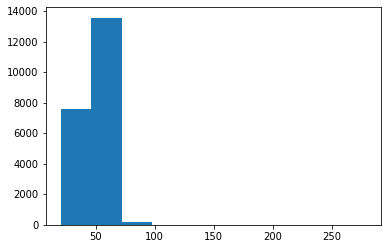

In [116]:
plt.hist(pred.detach().numpy(), 10)